In [2]:
from math import exp
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import csv

Open report file, recalling that $s$ corresponds to the probability of survival until size $\Lambda$.

$$
\text{m_array} = - \log_2 (p)
$$

$$
\text{p_log_s} = - p \cdot \log \big( s \big)
$$

In [3]:
with open('./report.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    m_array = []
    minus_p_log_s = []
    for row in reader:
        print([int(row[0]), float(row[1])])
        m_array.append(int(row[0]))
        minus_p_log_s.append(float(row[1]))

[2, 0.7882701610673704]
[3, 0.8723639563142157]
[4, 1.1143446061564282]
[5, 1.4318156983740595]
[6, 1.7588088484928857]
[7, 2.0599962963352656]
[8, 2.320269007781867]
[9, 2.5297817417991024]
[10, 2.7069103024179975]
[11, 2.8462136488182512]
[12, 2.9543544505877124]
[13, 3.03796182744426]


Generate the $p$ array and convert all of them to np arrays. Also
$$
\text{minus_log_s} = - \log(s)
$$

In [6]:
p = []
for m in m_array:
    p.append(2**(-m))

minus_p_log_s = np.array(minus_p_log_s)
p = np.array(p)
minus_log_s = np.divide(minus_p_log_s, p)

**Report A** - finding out the value of $\alpha$:
Supposing that
$$
s = \exp \{ -a p^{-\alpha} \},
$$
we get
$$
-\log(-\log(s)) = -\log(a) - \alpha (- \log(p))
$$
Define
$$
\text{minux_log_p} = - \log (p)
$$
$$
\text{minus_log_minus_log_s} = -\log(-\log(s))
$$

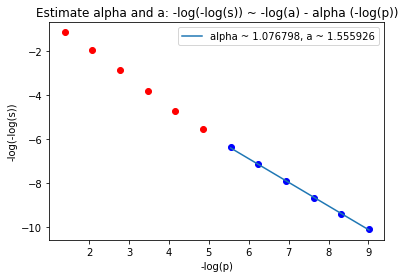

In [32]:
truncateA = len(m_array) - 6

minus_log_p = -np.log(p)
minus_log_minus_log_s = -np.log(minus_log_s)
reg = LinearRegression().fit(minus_log_p[truncateA:].reshape(-1,1), minus_log_minus_log_s[truncateA:])
coef = reg.coef_[0]
inter = reg.intercept_

#plt.subplot(2, 3, 1)
plt.title("Estimate alpha and a: -log(-log(s)) ~ -log(a) - alpha (-log(p))")
plt.xlabel("-log(p)")
plt.ylabel("-log(-log(s))")
plt.scatter(minus_log_p[0:truncateA], minus_log_minus_log_s[0:truncateA], color="red")
plt.scatter(minus_log_p[truncateA:], minus_log_minus_log_s[truncateA:], color="blue")
plt.plot([minus_log_p[truncateA], minus_log_p[-1]], [inter + coef * minus_log_p[truncateA],
                                                     inter + coef * minus_log_p[-1]])
plt.legend(["alpha ~ {:.6f}, a ~ {:.6f}".format(-coef, exp(-inter))])


**Report B:** - finding out $a$, assuming $\alpha = 1$.
$$
s = \exp\{-a/p\}
$$
$$
\log(s) = - a \cdot \Big( \frac{1}{p} \Big)
$$
Define
$$
\text{p_inverse} = \frac{1}{p}
$$

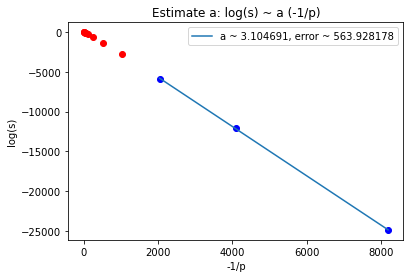

In [33]:
truncateB = len(m_array) - 3

p_inverse = np.divide(1, p)
log_s = - minus_log_s
reg = LinearRegression().fit(p_inverse[truncateB:].reshape(-1,1), log_s[truncateB:])
coef = reg.coef_[0]
inter = reg.intercept_

#plt.subplot(2, 3, 1)
plt.title("Estimate a: log(s) ~ a (-1/p)")
plt.xlabel("-1/p")
plt.ylabel("log(s)")
plt.scatter(p_inverse[0:truncateB], log_s[0:truncateB], color="red")
plt.scatter(p_inverse[truncateB:], log_s[truncateB:], color="blue")
plt.plot([p_inverse[truncateB], p_inverse[-1]], [inter + coef * p_inverse[truncateB],
                                                     inter + coef * p_inverse[-1]])
plt.legend(["a ~ {:.6f}, error ~ {:.6f}".format(-coef, inter)])

**Report C:** - finding out...
$$
s = \exp \Big\{ -\frac{a}{p} + \frac{b}{\sqrt{p}} \Big\}
$$
$$
p \log(s) + a = b \Big( \frac{1}{p} \Big)^{-1/2}
$$

In [19]:
truncateC = 9

p_inverse = np.divide(1, p)
log_s = - minus_log_s
reg = LinearRegression().fit(minus_p_inverse[truncateC:].reshape(-1,1), log_s[truncateC:])
coef = reg.coef_[0]
inter = reg.intercept_

#plt.subplot(2, 3, 1)
plt.title("Estimate a: log(s) ~ a (-1/p)")
plt.xlabel("-1/p")
plt.ylabel("log(s)")
plt.scatter(minus_p_inverse[0:truncateC], log_s[0:truncateC], color="red")
plt.scatter(minus_p_inverse[truncateC:], log_s[truncateC:], color="blue")
plt.plot([minus_p_inverse[truncateC], minus_p_inverse[-1]], [inter + coef * minus_p_inverse[truncateC],
                                                     inter + coef * minus_p_inverse[-1]])
plt.legend(["a ~ {:.6f}, error ~ {:.6f}".format(-coef, inter)])

3.289868133696453